Maximum Entropy Model and Expectation-maximization algorithm，最大熵模型与EM算法。

## 阅读指南

1. 在线观看请使用Chrome浏览器，并安装插件：[MathJax Plugin for Github(需科学上网)](https://chrome.google.com/webstore/detail/mathjax-plugin-for-github/ioemnmodlmafdkllaclgeombjnmnbima)， 插件[Github地址](https://github.com/orsharir/github-mathjax)
2. 或下载内容到本地，使用markdown相关软件打开，如：[Typora](https://typora.io/)
3. **若数学公式显示出现问题大家也可通过jupyter notebook链接查看：[Maximum-Entropy-Model-and-Expectation-maximization-algorithm](https://nbviewer.jupyter.org/github/Knowledge-Precipitation-Tribe/Maximum-Entropy-Model-and-Expectation-maximization-algorithm/blob/master/jupyter%20notebook/Maximum-Entropy-Model-and-Expectation-maximization-algorithm.ipynb)**

## Content

- <a href = "#熵等相关概念">熵等相关概念</a>
  - <a href = "#信息量">信息量</a>
  - <a href = "#熵">熵</a>
    - <a href = "#联合熵">联合熵</a>
    - <a href = "#条件熵">条件熵</a>
    - <a href = "#互信息">互信息</a>
  - <a href = "#相对熵">相对熵</a>
  - <a href = "#交叉熵">交叉熵</a>
- <a href = "#最大熵模型">最大熵模型</a>
- <a href = "#Jensen不等式">Jensen不等式</a>
- <a href = "#极大似然估计">极大似然估计</a>
- <a href = "#极大似然估计与EM算法的适用问题">极大似然估计与EM算法的适用问题</a>
- <a href = "#EM算法">EM算法</a>
  - <a href = "#什么是EM算法">什么是EM算法</a>
  - <a href = "#EM算法的通俗解释">EM算法的通俗解释</a>
    - <a href = "#例子1">例子1</a>
    - <a href = "#例子2">例子2</a>
  - <a href = "#数学推导">数学推导</a>
  - <a href = "#EM算法流程">EM算法流程</a>
  - <a href = "#代码实现">代码实现</a>
    - <a href = "#二维高斯分布">二维高斯分布</a>
    - <a href = "#数据可视化">数据可视化</a>
    - <a href = "#变量初始化">变量初始化</a>
    - <a href = "#E步骤">E步骤</a>
    - <a href = "#M步骤">M步骤</a>
    - <a href = "#迭代求解">迭代求解</a>
    - <a href = "#完整代码">完整代码</a>
- <a href = "#参考文献">参考文献</a>


# [Jensen不等式](#content)

# [极大似然估计](#content)

# [极大似然估计与EM算法的适用问题](#content)

参考自详解EM算法与混合高斯模型$^{[6]}$。

**极大似然估计：**

适用于某组数据服从某一分布，我们现在得到了这组数据中的采样值，现在我们想求解这一分布的参数情况，我们可以采用极大似然的方法进行求解。就像之前介绍到的，在极大似然估计中我们是对似然函数求偏导，令其得0，然后得到模型的参数，但是如果数据是来自多个分布，就没办法通过求导得0的方法来得到参数的估计值了，这时就要用到EM算法。

**EM算法：**

适用于某组数据服从一个混合的分布(如果这几个分布都是高斯分布的话，那么这个就叫做高斯混合模型)。现在我们得到了这一混合分布中的一些采样数据，反推这些采样数据分别是属于哪一类的，这时候我们可以采用EM算法进行求解。

![em-mle](../img/em-mle.png)

# [EM算法](#content)

## [什么是EM算法](#content)

EM算法被称为数据挖掘的十大算法之一，在机器学习和数据挖掘领域占有很重要的地位。接下来我就用尽量通俗的语言来梳理一下EM算法。EM算法也称为期望最大化(Expectation-Maximum)算法，在很多地方都能看到他的身影，例如HMM以及LDA等。

> 维基百科定义：
>
> **最大期望算法**（**Expectation-maximization algorithm**，又译**期望最大化算法**）在统计中被用于寻找，依赖于不可观察的隐性变量的概率模型中，参数的最大似然估计。
>
> 在[统计](https://zh.wikipedia.org/wiki/统计)[计算](https://zh.wikipedia.org/wiki/计算)中，**最大期望（EM）算法**是在[概率模型](https://zh.wikipedia.org/wiki/概率模型)中寻找[参数](https://zh.wikipedia.org/wiki/参数)[最大似然估计](https://zh.wikipedia.org/wiki/最大似然估计)或者[最大后验估计](https://zh.wikipedia.org/wiki/最大后验概率)的[算法](https://zh.wikipedia.org/wiki/算法)，其中概率模型依赖于无法观测的[隐变量](https://zh.wikipedia.org/wiki/隐变量)。最大期望算法经常用在[机器学习](https://zh.wikipedia.org/wiki/机器学习)和[计算机视觉](https://zh.wikipedia.org/wiki/计算机视觉)的[数据聚类](https://zh.wikipedia.org/wiki/数据聚类)（Data Clustering）领域。最大期望算法经过两个步骤交替进行计算，第一步是计算期望（E），利用对隐藏变量的现有估计值，计算其最大似然估计值；第二步是最大化（M），最大化在E步上求得的[最大似然值](https://zh.wikipedia.org/wiki/最大似然估计)来计算参数的值。M步上找到的参数估计值被用于下一个E步计算中，这个过程不断交替进行。

看完是不是有种黑人问号脸的感觉。

![heirenwenhao](../img/heirenwenhao.jpg)

但是不要慌，我们接下来就来梳理一下这个EM算法。

## [EM算法通俗解释](#content)

在一些资料中首先会介绍一下什么是似然函数，什么是极大似然估计等等，我们这里先试着抛开这些东西不谈，直接来理解一下EM算法。

**EM算法用最简单的话来说就是：给你一堆数据，然后告诉你这些数据是满足一个分布的，现在你就来推导一下参数是什么样的分布可以拟合这堆数据。**

如果你了解过参数估计，那你可能会有一点头绪，就算没有头绪也没关系，现在我们来看一个例子。

### [例子1](#content)

例子可能并不那么严谨，欢迎批评指正。

现在我们有4位志愿者，我们通过测量获得了他们的身高数据。但是这些志愿者当中有男性有女性，具体比例我们没有记录，所以不知道男女各有多少，假设男女各占的比例分别用$\pi_{男},\pi_{女}$表示。假设男性和女性的身高分别服从$\mathrm{N}\left(\mu_{男}, \sigma_{男}^{2}\right)$和$\mathrm{N}\left(\mu_{女}, \sigma_{女}^{2}\right)$的高斯分布，现在我们来估计一下这六个参数$\mu_{男}, \sigma_{男} ^ {2},\mu_{女}, \sigma_{女} ^ {2},\pi_{男},\pi_{女}$可能的值是多少。

解：

反正现在是让我们估计这几个参数，我们不妨瞎猜一下，就假设$\mu_{男}=170, \sigma_{男} ^ 2=36,\mu_{女}=160, \sigma_{女} ^ 2=25$，而且男女各一半我们用$\pi_{男}=\pi_{女}=0.5$表示。

而且已知其是满足高斯分布的，那么我们可以得到高斯分布的概率密度函数：
$$
f(x)=\frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{(x-\mu)^{2}}{2 \sigma^{2}}}
$$
现在我们拿到第一个志愿者的身高数据：$x_1=188$，我们现在来判断一下第一个志愿者属于男性的概率有多大。我们现在将188代入到概率密度函数当中
$$
\begin{aligned}f(188 | \mu_{男}, \sigma_{男}^{2}) &=\frac{1}{6 \times \sqrt{2 \pi}} e^{-\frac{(188-170)^{2}}{2 \times 6 ^ 2}} \\&= 7.368 \times 10^{-4} \\f(188 | \mu_{女}, \sigma_{女}^{2}) &=\frac{1}{5 \times \sqrt{2 \pi}} e^{-\frac{(188-160)^{2}}{2 \times 5 ^{2}}} \\&= 1.236 \times 10^{-8}\end{aligned}
$$
而且我们假设$\pi_{男}=\pi_{女}=0.5$，那么当前第一个志愿者为男性的概率
$$
\frac{7.368 \times 10^{-4} \times 0.5}{7.368 \times 10^{-4} \times 0.5+1.236 \times 10^{-8} \times 0.5}=0.999
$$
为女性的概率
$$
\frac{1.236 \times 10^{-8} \times 0.5}{7.368 \times 10^{-4} \times 0.5+1.236 \times 10^{-8} \times 0.5}=0.001
$$
看来我们猜的还可以，188属于男性的概率确实很高。Anyway，我们继续来算一下剩下的三个志愿者的数据，与第一个志愿的算法类似，这里就不再赘述了。

剩下的三个志愿者的身高数据分别为：$x_2=158, x_3=165, x_4=170$。那我们就可以得到这样一组数据。
$$
x_{1} = 188 = \left\{\begin{array}{ll}0.999, \text {男} \\0.001, \text {女}\end{array}\right. ,x_{2}= 158 = \left\{\begin{array}{ll}0.098, \text {男} \\0.901, \text {女}\end{array}\right. ,x_{3} = 165 = \left\{\begin{array}{ll}0.490, \text {男} \\0.510, \text {女}\end{array}\right. ,x_{4} = 170 = \left\{\begin{array}{ll}0.529, \text {男} \\0.471, \text {女}\end{array}\right.
$$
之后我们再将每一组数据中的男女汇总一下，得到这样一组数据
$$
x_{1} = \left\{\begin{array}{ll}188 \times 0.999 = 187.812, \text {男} \\188 \times 0.001 = 0.188, \text {女}\end{array}\right. ,x_{2} = \left\{\begin{array}{ll}158 \times 0.098 = 15.484, \text {男} \\158 \times 0.901 = 142.358, \text {女}\end{array}\right. \\x_{3}  = \left\{\begin{array}{ll}165 \times 0.490 = 80.85, \text {男} \\165 \times 0.510 = 84.51, \text {女}\end{array}\right. ,x_{4} = \left\{\begin{array}{ll}170 \times 0.52 = 88.4, \text {男} \\170 \times 0.47 = 79.9, \text {女}\end{array}\right.
$$
这样的到的四组数据中男和女就更符合现实的情况，因为我们已经把真实的数据掺进去做了一遍计算，那么现在用这四组数据中的男和女来调整一下最开始估计的那六个参数$\mu_{男}, \sigma_{男} ^ 2,\mu_{女}, \sigma_{女} ^ 2,\pi_{男},\pi_{女}$。

其中$\pi_{男},\pi_{女}$的调整方式就是将四组数据中男，女的可能性相加处以4得到的：
$$
\pi_{男} = \frac{0.999 + 0.098 + 0.490 + 0.529}{4} = 0.529 \\\pi_{女} = \frac{0.001 + 0.901 + 0.510 + 0.471}{4} = 0.470
$$
我们再来调整一下$\mu_{男}, \sigma_{男}$，这两个参数怎么调整呢，这里直接告诉你一个结论，先不用管他是怎么来的，我们会用就ok了。如果有一组数据$x_1, x_2, x_3, x_4$符合高斯$\mathrm{N}\left(\mu, \sigma\right)$分布，那么他们的参数的估计值为：
$$
\begin{aligned}&\mu=\frac{1}{n} \sum_{i} x_{i}\\&\sigma^{2}=\frac{1}{n} \sum_{i}\left(x_{i}-\mu\right)^{2}\end{aligned}
$$
根据这个结论我们拿得到的四组数据更新一下对应的$\mu_{男}, \sigma_{男} ^ 2$。
$$
\mu_{男} = \frac{181.812+15.484+80.85+88.4}{0.999+0.098+0.490+0.529}=173.225 \\\sigma_{男} ^ 2 = \frac{(187.812-173.225)^{2}+(15.484-173.225)^{2}+(80.85-173.225)^{2}+(88.4-173.225)^{2}}{0.999+0.098+0.490+0.529}=19292.733
$$
根据相同的原则，我们再来更新一下对应的$\mu_{女}, \sigma_{女} ^ 2$。
$$
\mu_{女} = \frac{0.188+142.358+84.51+79.9}{0.001+0.901+0.510+0.471}=163.014 \\\sigma_{女} ^ 2 = \frac{(0.188-163.014)^{2}+(142.358-163.014)^{2}+(84.51-163.014)^{2}+(79.9-163.014)^{2}}{0,001+0,901+0.510+0.471}=21247.897
$$
然后我们根据更新后的参数再次从头计算一下，因为每次计算都相当于将数据的真实情况掺杂的参数中，最终就能收敛到符合数据分布的真实情况。
其实这个例子还有另外一个名称就是高斯混合模型GMM。

### [例子2](#content)

这里贴一下July$^{[5]}$的硬币案例：

两枚硬币A和B，假定随机抛掷后正面朝上概率分别为$P_A$，$P_B$。为了估计这两个硬币朝上的概率，咱们轮流抛硬币A和B，每一轮都连续抛5次，总共5轮：

| 硬币 | 结果       | 统计    |
| :--- | ---------- | ------- |
| A    | 正正反正反 | 3正-2反 |
| B    | 反反正正反 | 2正-3反 |
| A    | 正反反反反 | 1正-4反 |
| B    | 正反反正正 | 3正-2反 |
| A    | 反正正反反 | 2正-3反 |

硬币A被抛了15次，在第一轮、第三轮、第五轮分别出现了3次正、1次正、2次正，所以很容易估计出$P_A$，类似的，$P_B$也很容易计算出来，如下：

$$P_A = （3+1+2）/ 15 = 0.4$$
$$P_B= （2+3）/10 = 0.5$$

问题来了，如果我们不知道抛的硬币是A还是B呢（即硬币种类是隐变量），然后再轮流抛五轮，得到如下结果：

| 硬币    | 结果       | 统计    |
| ------- | ---------- | ------- |
| Unknown | 正正反正反 | 3正-2反 |
| Unknown | 反反正正反 | 2正-3反 |
| Unknown | 正反反反反 | 1正-4反 |
| Unknown | 正反反正正 | 3正-2反 |
| Unknown | 反正正反反 | 2正-3反 |

OK，问题变得有意思了。现在我们的目标没变，还是估计$P_A$和$P_B$，需要怎么做呢？

> 显然，此时我们多了一个硬币种类的隐变量，设为$z$，可以把它认为是一个5维的向量$（z_1,z_2,z_3,z_4,z_5)$，代表每次投掷时所使用的硬币，比如$z_1$，就代表第一轮投掷时使用的硬币是A还是B。
>
> - 但是，这个变量$z$不知道，就无法去估计$P_A$和$P_B$，所以，我们必须先估计出$z$，然后才能进一步估计$P_A$和$P_B$。
> - 可要估计$z$，我们又得知道$P_A$和$P_B$，这样我们才能估计z，这不是鸡生蛋和蛋生鸡的问题吗，如何破？

> 答案就是先随机初始化一个$P_A$和$P_B$，用它来估计$z$，然后基于$z$，还是按照去估计新的$P_A$和$P_B$，如果新的$P_A$和$P_B$和我们初始化的$P_A$和$P_B$一样，请问这说明了什么？
>
> 这说明我们初始化的$P_A$和$P_B$是一个相当靠谱的估计！
>
> 就是说，我们初始化的$P_A$和$P_B$，可以估计出$z$，然后基于$z$，反过来估计出$P_1$和$P_2$，当与我们初始化的$P_A$和$P_B$一样时，说明是$P_1$和$P_2$很有可能就是真实的值。
>
> 如果新估计出来的$P_A$和$P_B$和我们初始化的值差别很大，怎么办呢？就是继续用新的$P_1$和$P_2$迭代，直至收敛。

我们不妨这样，先随便给$P_A$和$P_B$赋一个值，比如：
硬币A正面朝上的概率$P_A = 0.2$
硬币B正面朝上的概率$P_B = 0.7$

然后，我们看看第一轮抛掷最可能是哪个硬币。
如果是硬币A，得出3正2反的概率为 $0.2*0.2*0.2*0.8*0.8 = 0.00512$
如果是硬币B，得出3正2反的概率为$0.7*0.7*0.7*0.3*0.3=0.03087$
然后依次求出其他4轮中的相应概率。做成表格如下（标粗表示其概率更大）：

| 轮数 | 若是硬币A                                   | 若是硬币B            |
| ---- | ------------------------------------------- | -------------------- |
| 1    | 0.00512，即0.2 0.2 0.2 0.8 0.8，3正-2反     | **0.03087**，3正-2反 |
| 2    | **0.02048**，即0.2 0.2 0.8 0.8 0.8，2正-3反 | 0.01323，2正-3反     |
| 3    | **0.08192**，即0.2 0.8 0.8 0.8 0.8，1正-4反 | 0.00567，1正-4反     |
| 4    | 0.00512，即0.2 0.2 0.2 0.8 0.8，3正-2反     | **0.03087**，3正-2反 |
| 5    | **0.02048**，即0.2 0.2 0.8 0.8 0.8，2正-3反 | 0.01323，2正-3反     |

按照最大似然法则：

- 第1轮中最有可能的是硬币B
- 第2轮中最有可能的是硬币A
- 第3轮中最有可能的是硬币A
- 第4轮中最有可能的是硬币B
- 第5轮中最有可能的是硬币A

我们就把概率更大，即更可能是A的，即第2轮、第3轮、第5轮出现正的次数2、1、2相加，除以A被抛的总次数15（A抛了三轮，每轮5次），作为z的估计值，B的计算方法类似。然后我们便可以按照估计新的$P_A$和$P_B$。

$P_A = （2+1+2）/15 = 0.33$
$P_B =（3+3）/10 = 0.6$

设想我们是全知的神，知道每轮抛掷时的硬币就是如本文本节开头标示的那样，那么，$P_A$和$P_B$的估计就是0.4和0.5（下文中将这两个值称为$P_A$和$P_B$的真实值）。那么对比下我们初始化的$P_A$和$P_B$和新估计出的$P_A$和$P_B$：

| 初始化的$P_A$ | 估计出的$P_A$ | 真实的$P_A$ | 初始化的$P_B$ | 估计出的$P_B$ | 真实的$P_B$ |
| ------------- | ------------- | ----------- | ------------- | ------------- | ----------- |
| 0.2           | 0.33          | 0.4         | 0.7           | 0.6           | 0.5         |

看到没？我们估计的$P_A$和$P_B$相比于它们的初始值，更接近它们的真实值了！就这样，不断迭代不断接近真实值，这就是EM算法的奇妙之处。

可以期待，我们继续按照上面的思路，用估计出的$P_A$和$P_B$再来估计$z$，再用$z$来估计新的$P_A$和$P_B$，反复迭代下去，就可以最终得到$P_A = 0.4$，$P_B=0.5$，此时无论怎样迭代，$P_A$和$P_B$的值都会保持0.4和0.5不变，于是乎，我们就找到了$P_A$和$P_B$的最有可能的估计值。

## [问题思考](#content)

看完这两个例子不知道大家有没有更清楚EM算法的整个流程，但是你可能会有以下疑问🤔️：

- 身高的例子中最开始的分布情况真的是瞎猜的么？
- 硬币的例子中通过z估计$P_A$和$P_B$是采用什么方式估计的呢？
- 硬币中的隐变量z代表什么？在身高的案例中哪个是隐变量呢？

这几点疑问可以这样来解释：

- 其实在身高的那个案例中我想大家也能发现，我们猜测的那几个参数$\mu_{男}, \sigma_{男} ^ {2},\mu_{女}, \sigma_{女} ^ {2}$还是很符合真实情况的，就像身高188，我们计算之后确实是男性的可能性会更大。这四个参数也不是我胡乱猜测的，而是我在网上查到的人类身高分布情况，然后根据国家统计局的数据做的一个预设。这一步数学化来说就是先验概率。

- 在抛硬币的案例中，我们是已经观察到了几正几反，然后反推是哪一个硬币出现这种情况的可能性大。这个用数学化来说就是极大似然估计。

- 硬币中的隐变量z就是我们不知道这个硬币到底是A还是B，要是能知道这个硬币是A还是B那么我们就可以直接算出来A和B正面朝上的概率了。在身高例子中，我们不知道当前这个志愿者到底是男生还是女生，如果知道的话，那么我们的男女比例$\pi_{男},\pi_{女}$就已知了。而且要是知道哪几个是男性的话，我们直接用男性身高数据的参数估计就直接能得到$\mu_{男}, \sigma_{男} ^ {2}$，也就不用再那么复杂的计算了。

所以EM算法的流程就是这样：

1. 先给出数据的先验概率，来假设参数，这个参数我们统一用$\theta$来表示
2. 然后根据当前的数据和参数$\theta$，来计算一下这个隐变量的可能的值(这个值用数学化表述就是隐变量在条件是的情况下的数学期望)。
3. 根据计算出来的隐变量可能的值，反过来用极大似然估计的方法推倒发生这样的情况下，参数$\theta$的最优解是多少？
4. 通过一次计算我们肯定不能知道$\theta$是不是最优值，我们还要继续执行2，3两步，直到参数已经变化不大了，我们就可以判定这个$\theta$收敛到了一个近似的最优解。

## [数学推导](#content)

假定我们现在有训练集$\left\{x^{(1)}, x^{(2)}, \cdots, x^{(m)}\right\}$，包含m个独立的样本，我们现在希望从中找到该组数据的模型的参数$\theta$。为了求解这个问题，我们先取参数的对数极大似然
$$
l(\theta)=\sum_{i=1}^{m} \log p(x^{i} ; \theta)
$$
但是我们不要忘了，我们还有隐变量$z=$$
\left(z^{1}, z^{2}, \ldots z^{m}\right)
$，我们也要把z添加到似然函数当中去
$$
l(\theta)=\sum_{i=1}^{m} \log \sum_{z} p(x^{i}, z ; \theta)
$$
正常极大似然估计是最大化上面那个式子，求导令其得0求得参数值，但是这里明显无法直接求出参数的。所以我们需要一些技巧来求解这个似然函数。

我们令$Q_i$代表隐变量$z$的一个分布，现在我们来改造一下似然函数(这里就是上下同时乘以$Q_i$)
$$
\begin{aligned}l(\theta)=\sum_{i=1}^{m} \log \sum_{z} P\left(x^{i}, z ; \theta\right) &=\sum_{i=1}^{m} \log \sum_{Z^{(i)}} Q_{i}\left(z^{(i)}\right) \frac{P\left(x^{(i)}, z^{(i)} ; \theta\right)}{Q_{i}\left(z^{(i)}\right)}           \\& \geq \sum_{i=1}^{m} \sum_{z^{(i)}} Q_{i}\left(z^{(i)}\right) \log \frac{P\left(x^{(i)}, z^{(i)} ; \theta\right)}{Q_{i}\left(z^{(i)}\right)}\end{aligned}
$$
这里我们还要注意一下这个式子
$$
\sum_{z^{(i)}} Q_{i}\left(z^{(i)}\right)\frac{p\left(x^{(i)}, z^{(i)} ; \theta\right)}{Q_{i}\left(z^{(i)}\right)}
$$
这个代表什么意思呀？这个不就是$\frac{p\left(x^{(i)}, z^{(i)} ; \theta\right)}{Q_{i}\left(z^{(i)}\right)}$的期望么？（不理解的可以翻看一下期望的公式）

这里用到了<a href = "#Jensen不等式">Jensen不等式</a>，将等号变为大于等于号，而且因为这里的对数函数为凹函数，所以得出这个结论
$$
f(E(x)) \geq E(f(x)) \quad \text { 如果 } f(x) \text { 是凹函数 }
$$
但是我们还要考虑的一点是，什么情况下才能取到这个等号。
$$
\frac{P\left(x^{(i)}, z^{(i)} ; \theta\right)}{Q_{i}\left(z^{(i)}\right)}=c, c \text { 为常数 }
$$
我们只有令上面这个式子等于c也就是为一个定值时才能取到等号。而且$Q_i$是一个分布，所以满足
$$
\sum_{z} Q_{i}\left(z^{(i)}\right)=1
$$
这样结合上面的公式，我们得到这样一个结果
$$
\left.Q_{i}\left(z^{(i)}\right)=\frac{P\left(x^{(i)}, z^{(i)} ; \theta\right)}{\sum_{z} P\left(x^{(i)}, z^{(i)} ; \theta\right)}=\frac{P\left(x^{(i)}, z^{(i)} ; \theta\right)}{P\left(x^{(i)} ; \theta\right)}=P\left(z^{(i)} | x^{(i)} ; \theta\right)\right.
$$
也就是说令$Q_i$为$\theta$的一个条件概率时就可以满足上面的条件。到这里就是EM算法中的E。

现在如果我们极大化这个式子
$$
\theta := \arg \max _{\theta} \sum_{i=1}^{m} \sum_{z^{(i)}} Q_{i}\left(z^{(i)}\right) \log \frac{P\left(x^{(i)}, z^{(i)} ; \theta\right)}{Q_{i}\left(z^{(i)}\right)}
$$
也就意味着在寻找似然函数$l(\theta)$的下界。发现没有我们将原来复杂的一个问题简单化了，现在我们尽可能的让上面的式子求其最大值，直到这个最大值等于原本的似然函数$l(\theta)$，我们也就间接的得到了似然函数$l(\theta)$的极大值，有点绕，但是我们能得到一个信息，就是可以求似然函数的极大值了。这个下界我们不妨用$J$来表示，且$J$与$Q_i$有关。

![theta](../img/theta.jpeg)

固定$\theta_{1}$，调整$Q_i$使下界$J$与似然函数在$\theta_{1}$点处相等，然后固定$Q_i$，调整$\theta$使得下界$J$达到最大值，此时得到新的$\theta_{2}$，然后再固定$\theta_{2}$，调整$Q_i$使得下界$J$与似然函数相等，重复这个过程，直到收敛至似然函数的最大值。

现在我们把上面式子中的常数项去掉再看一下
$$
\theta := \arg \max _{\theta} \sum_{i=1}^{m} \sum_{z^{(i)}} Q_{i}\left(z^{(i)}\right) \log P\left(x^{(i)}, z^{(i)} ; \theta\right)
$$
上面这个式子就是EM算法中的M。

至此整个EM算法的数学公式推导过程已经完毕了。

## [EM算法流程](#content)

参考自EM算法原理总结$^{[4]}$。

EM算法的整体流程如下：

输入：数据$\left\{x^{(1)}, x^{(2)}, \cdots, x^{(m)}\right\}$，最大迭代次数J

（1）先验给出模型的初始化参数$\theta$

（2）for i from 1 to J:

​    （a）E: 计算期望
$$
\begin{aligned}&\left.Q_{i}\left(z^{(i)}\right)=P\left(z^{(i)} | x^{(i)}, \theta^{j}\right)\right)\\&L\left(\theta, \theta^{j}\right)=\sum_{i=1}^{m} \sum_{z^{(i)}} Q_{i}\left(z^{(i)}\right) \log P\left(x^{(i)}, z^{(i)} ; \theta\right)\end{aligned}
$$
​    （b）M: 最大化$L\left(\theta, \theta^{j}\right)$，得到$\theta^{j+1}$：
$$
\theta^{j+1}=\arg \max _{\theta} L\left(\theta, \theta^{j}\right)
$$
​    （c）如果已收敛，则算法结束，否则继续回到步骤（a）进行迭代

输出：模型参数$\theta$

## [代码实现](#content)
### [二维高斯分布](#content)

多维变量$X=(x_1,x_2,...,x_n)$的联合概率密度函数为：

$$
f(X)=\frac{1}{(2 \pi)^{d / 2}|\Sigma|^{1 / 2}} \exp \left[-\frac{1}{2}(X-u)^{T} \Sigma^{-1}(X-u)\right], X=\left(x_{1}, x_{2} \dots x_{n}\right)
$$

其中：

　　- $d$：变量维度。对于二维高斯分布，有d=2;
  
　　- $u=(u_1,u_2,...,u_n)$：各位变量的均值；
  
　　- $Σ$：协方差矩阵，描述各维变量之间的相关度。对于二维高斯分布，有：

$$
\Sigma=\left(\begin{array}{ll}
\delta_{11} & \delta_{12} \\
\delta_{21} & \delta_{22}
\end{array}\right)
$$

### [数据解析](#content)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from scipy.stats import multivariate_normal
plt.style.use('seaborn')

In [3]:
def plot_cluster(X, Mu_true, Var_true, color, ang = 0):
    plt.figure(figsize=(10, 8))
    plt.axis([-10, 15, -5, 15])
    ax = plt.gca()
    plt.scatter(X[:, 0], X[:, 1], s=5, c=color)
    plot_args = {'fc': 'None', 'lw': 2, 'edgecolor': color, 'alpha': 0.5}
    ellipse = Ellipse(Mu_true, 3 * Var_true[0], 3 * Var_true[1], angle=ang, **plot_args)
    ax.add_patch(ellipse)
    plt.show()

nums = [400, 600, 1000, 500]
true_Mu = [[0.5, 0.5], [5.5, 2.5], [1, 7], [9, 4.5]]
true_Var = [[1, 3], [2, 2], [6, 2], [1, 3]]
var = [np.diag(true_Var[0]), np.diag(true_Var[1]),np.diag(true_Var[2]),np.array([[1,-1],[-1,3]])]    

第一个例子
$$
u=(0.5 \quad 0.5), \Sigma=\left(\begin{array}{ll}
1 & 0 \\
0 & 3
\end{array}\right)
$$

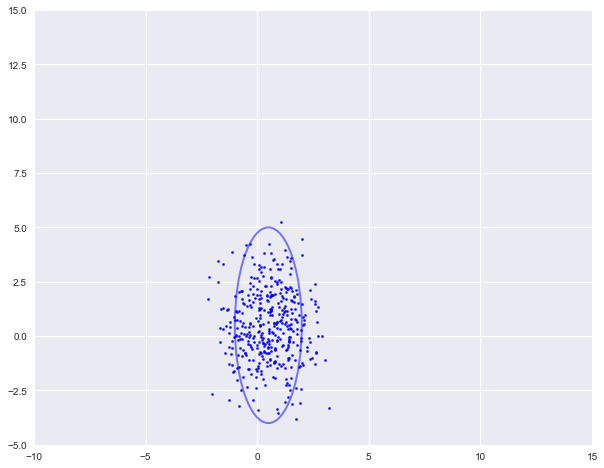

In [9]:
num1, mu1, var1 = nums[0], true_Mu[0], true_Var[0]
X1 = np.random.multivariate_normal(mu1, var[0], num1)
plot_cluster(X1, [0.5, 0.5], [1, 3], 'b')

第二个例子
$$
u=(5.5 \quad 2.5), \Sigma=\left(\begin{array}{ll}
2 & 0 \\
0 & 2
\end{array}\right)
$$

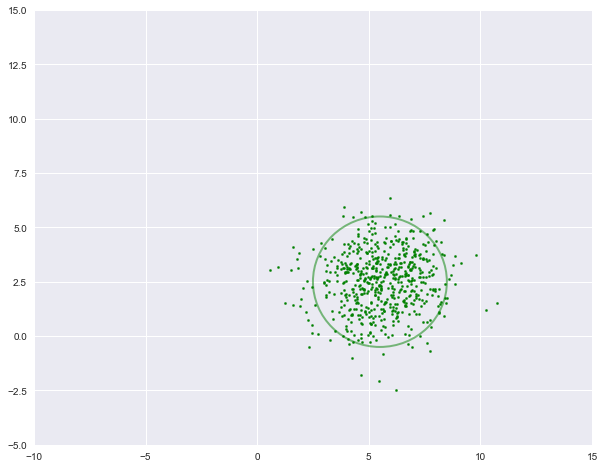

In [10]:
num2, mu2, var2 = nums[1], true_Mu[1], true_Var[1]
X2 = np.random.multivariate_normal(mu2, var[1], num2)
plot_cluster(X2, [5.5, 2.5], [2,2], 'g')

第三个例子
$$
u=(1 \quad 7), \Sigma=\left(\begin{array}{ll}
6 & 0 \\
0 & 2
\end{array}\right)
$$

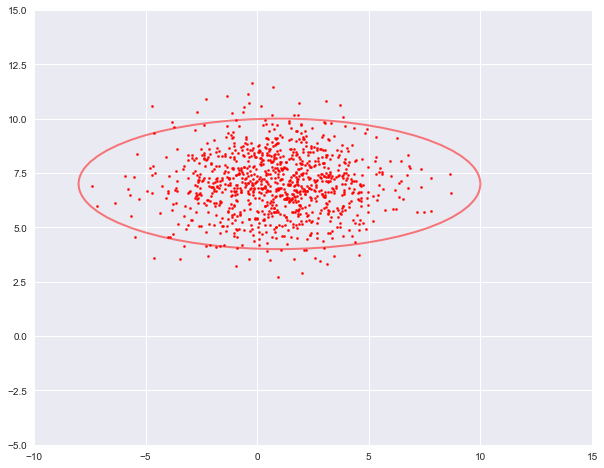

In [12]:
num3, mu3, var3 = nums[2], true_Mu[2], true_Var[2]
X3 = np.random.multivariate_normal(mu3, var[2], num3)
plot_cluster(X3, [1, 7], [6, 2], 'r')

第四个例子
$$
u=(9 \quad 4.5), \Sigma=\left(\begin{array}{ll}
1 & -1 \\
-1 & 3
\end{array}\right)
$$

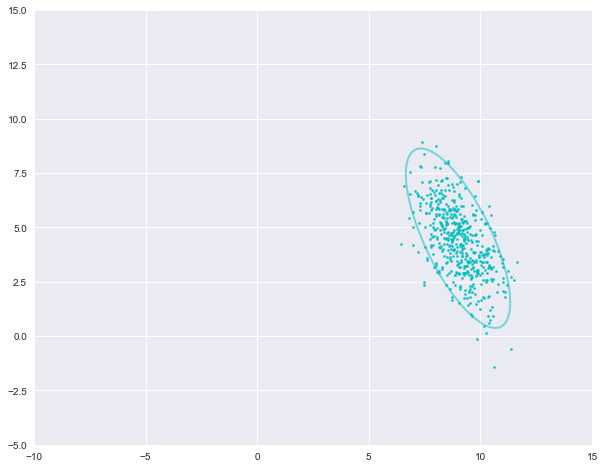

In [20]:
num4, mu4, var4 = nums[3], true_Mu[3], true_Var[3]
X4 = np.random.multivariate_normal(mu4, var[3], num4)
plot_cluster(X4, [9, 4.5], [1, 3], 'c', 25)

最后来看一下汇总图

![clusters](../img/clusters.png)

### [变量初始化](#content)
首先要对GMM模型参数以及隐变量进行初始化。通常可以用一些固定的值或者随机值。

- n_clusters是GMM模型中聚类的个数，和K-Means一样我们需要提前确定。这里我们除去倾斜的蓝色数据，所以聚类个数为3。

- n_points是样本点的个数。

- Mu是每个高斯分布的均值。

- Var是每个高斯分布的方差，为了过程简便，我们这里假设协方差矩阵都是对角阵。

- W是上面提到的隐变量，也就是每个样本属于每一簇的概率，在初始时，我们可以认为每个样本属于某一簇的概率都是1/3。

- Pi是每一簇的比重，可以根据W求得，在初始时，Pi = [1/3, 1/3, 1/3]

**注：如何确定GMM中的聚类个数**

- 方法一：BIC

$$
BIC=−2log(L)+klog(n)
$$

L是likelihood，k是component的个数，n是样本的个数。

- 方法二：cross validation

另一个方法是根据split test的结果（或者说cross validation的结果），先用训练集得到GMM的参数，然后再在测试集上计算log-likelihood。两者明显分叉的地方就是component个数的最佳候选。

![](../img/clusters-likehood.png)

参考：[https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_selection.html#sphx-glr-auto-examples-mixture-plot-gmm-selection-py](https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_selection.html#sphx-glr-auto-examples-mixture-plot-gmm-selection-py)

In [ ]:
n_clusters = 3
n_points = len(X)
Mu = [[0, -1], [6, 0], [0, 9]]
Var = [[1, 1], [1, 1], [1, 1]]
Pi = [1 / n_clusters] * 3
W = np.ones((n_points, n_clusters)) / n_clusters 
Pi = W.sum(axis=0) / W.sum()

### [E步骤](#content)

$$
\left.Q_{i}\left(z^{(i)}\right)=P\left(z^{(i)} | x^{(i)}, \theta^{j}\right)\right)
$$

E步骤中，我们的主要目的是更新W。第i个变量属于第m簇的概率为：
$$
W_{i, m}=\frac{\pi_{j} P\left(X_{i} | \mu_{m}, \operatorname{var}_{m}\right)}{\sum_{j=1}^{3} \pi_{j} P\left(X_{i} | \mu_{j}, \operatorname{var}_{j}\right)}
$$
根据W，我们就可以更新每一簇的占比$\pi_{m}$，
$$
\pi_{m}=\frac{\sum_{i=1}^{n} W_{i, m}}{\sum_{j=1}^{k} \sum_{i=1}^{n} W_{i, j}}
$$

In [ ]:
def update_W(X, Mu, Var, Pi):
    n_points, n_clusters = len(X), len(Pi)
    pdfs = np.zeros(((n_points, n_clusters)))
    for i in range(n_clusters):
        # multivariate_normal.pdf：多元正态分布的概率密度函数
        pdfs[:, i] = Pi[i] * multivariate_normal.pdf(X, Mu[i], np.diag(Var[i]))
    W = pdfs / pdfs.sum(axis=1).reshape(-1, 1)
    return W


def update_Pi(W):
    Pi = W.sum(axis=0) / W.sum()
    return Pi

以下是计算对数似然函数的logLH以及用来可视化数据的plot_clusters。

$$
L\left(\theta, \theta^{\prime}\right)=\sum_{i=1}^{m} \sum_{z^{(i)}} Q_{i}\left(z^{(i)}\right) \log P\left(x^{(i)}, z^{(i)} ; \theta\right)
$$

In [ ]:
def logLH(X, Pi, Mu, Var):
    n_points, n_clusters = len(X), len(Pi)
    pdfs = np.zeros(((n_points, n_clusters)))
    for i in range(n_clusters):
        pdfs[:, i] = Pi[i] * multivariate_normal.pdf(X, Mu[i], np.diag(Var[i]))
    return np.mean(np.log(pdfs.sum(axis=1)))


def plot_clusters(X, Mu, Var, Mu_true=None, Var_true=None):
    colors = ['b', 'g', 'r']
    n_clusters = len(Mu)
    plt.figure(figsize=(10, 8))
    plt.axis([-10, 15, -5, 15])
    plt.scatter(X[:, 0], X[:, 1], s=5)
    ax = plt.gca()
    for i in range(n_clusters):
        plot_args = {'fc': 'None', 'lw': 2, 'edgecolor': colors[i], 'ls': ':'}
        ellipse = Ellipse(Mu[i], 3 * Var[i][0], 3 * Var[i][1], **plot_args)
        ax.add_patch(ellipse)
    if (Mu_true is not None) & (Var_true is not None):
        for i in range(n_clusters):
            plot_args = {'fc': 'None', 'lw': 2, 'edgecolor': colors[i], 'alpha': 0.5}
            ellipse = Ellipse(Mu_true[i], 3 * Var_true[i][0], 3 * Var_true[i][1], **plot_args)
            ax.add_patch(ellipse)         
    plt.show()

### [M步骤](#content)

M步骤中，我们需要根据上面一步得到的W来更新均值Mu和方差Var。 Mu和Var是以W的权重的样本X的均值和方差。

因为这里的数据是二维的，第m簇的第k个分量的均值，

$$
\mu_{m, k}=\frac{\sum_{i=1}^{n} W_{i, m} X_{i, k}}{\sum_{i=1}^{n} W_{i, m}}
$$

第m簇的第k个分量的方差，

$$
\operatorname{var}_{m, k}=\frac{\sum_{i=1}^{n} W_{i, m}\left(X_{i, k}-\mu_{m, k}\right)^{2}}{\sum_{i=1}^{n} W_{i, m}}
$$

以上迭代公式写成如下函数update_Mu和update_Var。

In [ ]:
def update_Mu(X, W):
    n_clusters = W.shape[1]
    Mu = np.zeros((n_clusters, 2))
    for i in range(n_clusters):
        Mu[i] = np.average(X, axis=0, weights=W[:, i])
    return Mu

def update_Var(X, Mu, W):
    n_clusters = W.shape[1]
    Var = np.zeros((n_clusters, 2))
    for i in range(n_clusters):
        Var[i] = np.average((X - Mu[i]) ** 2, axis=0, weights=W[:, i])
    return Var

### [迭代求解](#content)

下面我们进行迭代求解。

图中实线是真实的高斯分布，虚线是我们估计出的高斯分布。可以看出，经过5次迭代之后，两者几乎完全重合。

In [ ]:
loglh = []
for i in range(5):
    plot_clusters(X, Mu, Var, [mu1, mu2, mu3], [var1, var2, var3])
    loglh.append(logLH(X, Pi, Mu, Var))
    W = update_W(X, Mu, Var, Pi)
    Pi = update_Pi(W)
    Mu = update_Mu(X, W)
    print('log-likehood:%.3f'%loglh[-1])
    Var = update_Var(X, Mu, W)

每次迭代的log-likehood如下

In [ ]:
log-likehood:-8.163
log-likehood:-4.701
log-likehood:-4.698
log-likehood:-4.697
log-likehood:-4.697

![](../img/em1.png)
![](../img/em2.png)
![](../img/em3.png)
![](../img/em4.png)
![](../img/em5.png)

### [完整代码](#content)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from scipy.stats import multivariate_normal
plt.style.use('seaborn')

def generate_X(true_Mu, true_Var):
    '''
    生成三个高斯分布数据
    :param true_Mu: 均值
    :param true_Var: 方差
    :return:
    '''
    # 第一簇的数据
    num1, mu1, var1 = 400, true_Mu[0], true_Var[0]
    X1 = np.random.multivariate_normal(mu1, np.diag(var1), num1)
    # 第二簇的数据
    num2, mu2, var2 = 600, true_Mu[1], true_Var[1]
    X2 = np.random.multivariate_normal(mu2, np.diag(var2), num2)
    # 第三簇的数据
    num3, mu3, var3 = 1000, true_Mu[2], true_Var[2]
    X3 = np.random.multivariate_normal(mu3, np.diag(var3), num3)
    # 合并在一起
    X = np.vstack((X1, X2, X3))
    # 显示数据
    plt.figure(figsize=(10, 8))
    plt.axis([-10, 15, -5, 15])
    plt.scatter(X1[:, 0], X1[:, 1], s=5)
    plt.scatter(X2[:, 0], X2[:, 1], s=5)
    plt.scatter(X3[:, 0], X3[:, 1], s=5)
    plt.show()
    return X

# E步骤更新W，也就是第i个变量属于第m簇的概率
# 更新W
def update_W(X, Mu, Var, Pi):
    n_points, n_clusters = len(X), len(Pi)
    pdfs = np.zeros(((n_points, n_clusters)))
    for i in range(n_clusters):
        # multivariate_normal.pdf：多元正态分布的概率密度函数
        pdfs[:, i] = Pi[i] * multivariate_normal.pdf(X, Mu[i], np.diag(Var[i]))
    W = pdfs / pdfs.sum(axis=1).reshape(-1, 1)
    return W

# 根据更新的W，更新每一簇的占比
# 更新pi
def update_Pi(W):
    Pi = W.sum(axis=0) / W.sum()
    return Pi


# 计算log似然函数
def logLH(X, Pi, Mu, Var):
    n_points, n_clusters = len(X), len(Pi)
    pdfs = np.zeros(((n_points, n_clusters)))
    for i in range(n_clusters):
        pdfs[:, i] = Pi[i] * multivariate_normal.pdf(X, Mu[i], np.diag(Var[i]))
    return np.mean(np.log(pdfs.sum(axis=1)))


# 画出聚类图像
def plot_clusters(X, Mu, Var, Mu_true=None, Var_true=None):
    colors = ['b', 'g', 'r']
    n_clusters = len(Mu)
    plt.figure(figsize=(10, 8))
    plt.axis([-10, 15, -5, 15])
    plt.scatter(X[:, 0], X[:, 1], s=5)
    ax = plt.gca()
    for i in range(n_clusters):
        plot_args = {'fc': 'None', 'lw': 2, 'edgecolor': colors[i], 'ls': ':'}
        ellipse = Ellipse(Mu[i], 3 * Var[i][0], 3 * Var[i][1], **plot_args)
        ax.add_patch(ellipse)
    if (Mu_true is not None) & (Var_true is not None):
        for i in range(n_clusters):
            plot_args = {'fc': 'None', 'lw': 2, 'edgecolor': colors[i], 'alpha': 0.5}
            ellipse = Ellipse(Mu_true[i], 3 * Var_true[i][0], 3 * Var_true[i][1], **plot_args)
            ax.add_patch(ellipse)
    plt.show()

# M步根据更新的W和PI来跟新均值Mu与方差Var
# 更新Mu
def update_Mu(X, W):
    n_clusters = W.shape[1]
    Mu = np.zeros((n_clusters, 2))
    for i in range(n_clusters):
        Mu[i] = np.average(X, axis=0, weights=W[:, i])
    return Mu


# 更新Var
def update_Var(X, Mu, W):
    n_clusters = W.shape[1]
    Var = np.zeros((n_clusters, 2))
    for i in range(n_clusters):
        Var[i] = np.average((X - Mu[i]) ** 2, axis=0, weights=W[:, i])
    return Var


if __name__ == '__main__':
    # 生成数据
    true_Mu = [[0.5, 0.5], [5.5, 2.5], [1, 7]]
    true_Var = [[1, 3], [2, 2], [6, 2]]
    X = generate_X(true_Mu, true_Var)
    # 初始化
    n_clusters = 3 #聚类的个数
    n_points = len(X)
    Mu = [[0, -1], [6, 0], [0, 9]]
    Var = [[1, 1], [1, 1], [1, 1]]
    Pi = [1 / n_clusters] * 3
    W = np.ones((n_points, n_clusters)) / n_clusters #隐变量
    Pi = W.sum(axis=0) / W.sum() #每一簇的比重，可以根据W求得
    # 迭代
    loglh = []
    for i in range(5):
        plot_clusters(X, Mu, Var, true_Mu, true_Var)
        loglh.append(logLH(X, Pi, Mu, Var))
        W = update_W(X, Mu, Var, Pi)
        Pi = update_Pi(W)
        Mu = update_Mu(X, W)
        print('log-likehood:%.3f'%loglh[-1])
        Var = update_Var(X, Mu, W)

## [参考文献](#content)

[1] 刘建平：[最大熵模型原理小结](https://www.cnblogs.com/pinard/p/6093948.html)

[2] 忆臻: [一文搞懂极大似然估计](https://zhuanlan.zhihu.com/p/26614750)

[3] 知行流浪：[极大似然估计详解](https://blog.csdn.net/zengxiantao1994/article/details/72787849)

[4] 刘建平：[EM算法原理总结](https://www.cnblogs.com/pinard/p/6912636.html)

[5] v_JULY_v：[如何通俗理解EM算法](https://blog.csdn.net/v_JULY_v/article/details/81708386)

[6] 林立民爱洗澡：[详解EM算法与混合高斯模型(Gaussian mixture model, GMM)](https://blog.csdn.net/lin_limin/article/details/81048411)